In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/Princia/Downloads/Mall_Customers.csv")

In [2]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

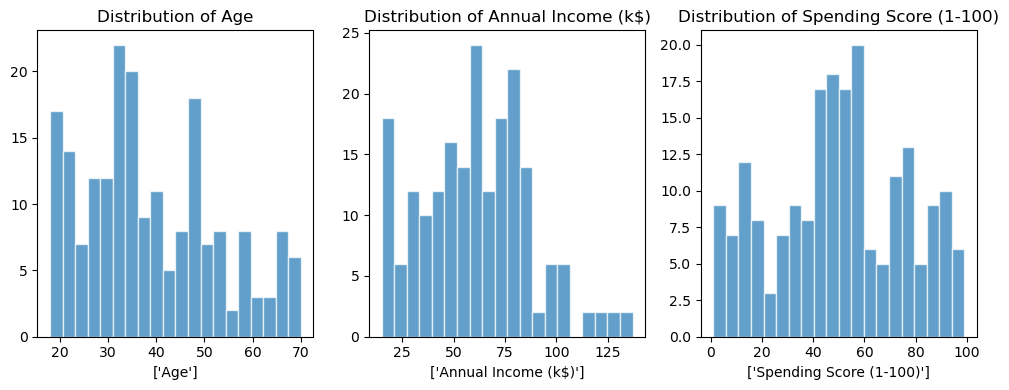

In [30]:
fig=plt.figure(figsize=(10,4))
axes=fig.subplots(1,3)
for i,cols in enumerate(['Age','Annual Income (k$)','Spending Score (1-100)']):
    axes[i].hist(df[cols],alpha=0.7,bins=20,edgecolor='white')
    axes[i].set_title(f"Distribution of {cols}")
    axes[i].set_xlabel([cols])
    fig.tight_layout()

In [3]:
df1=df.iloc[:,[3,4]].values


In [5]:
#k means clustering
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=model.fit_predict(df1)

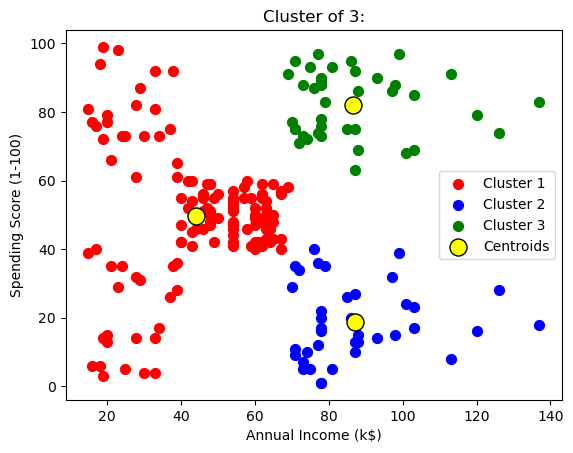

In [6]:
plt.scatter(df1[y_kmeans==0,0],df1[y_kmeans==0,1],color='red',s=50,label='Cluster 1')
plt.scatter(df1[y_kmeans==1,0],df1[y_kmeans==1,1],color='blue',s=50,label='Cluster 2')
plt.scatter(df1[y_kmeans==2,0],df1[y_kmeans==2,1],color='green',s=50,label='Cluster 3')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,color='yellow',label='Centroids',edgecolor='black')
plt.title("Cluster of 3:")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

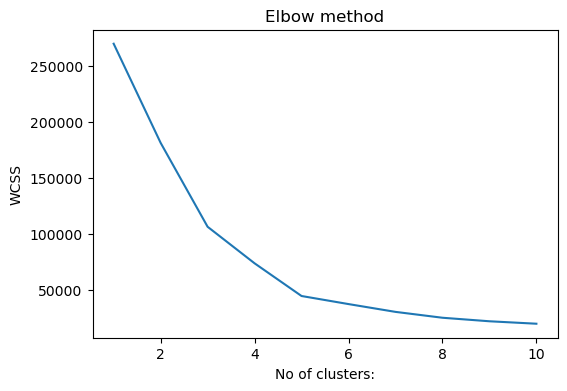

In [7]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(df1)
    wcss.append(model.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss)

plt.title("Elbow method")
plt.xlabel("No of clusters:")
plt.ylabel("WCSS")
plt.show()


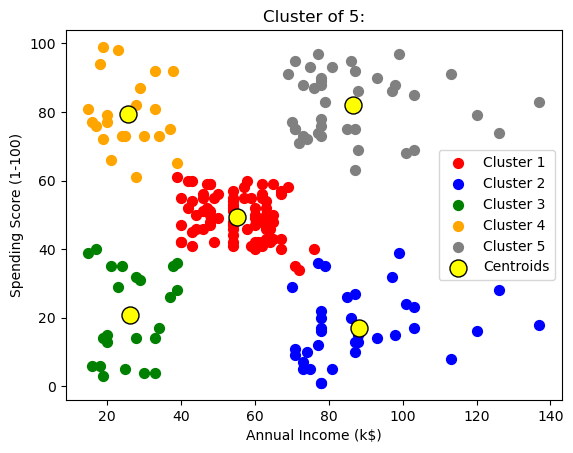

In [8]:
model=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=model.fit_predict(df1)
plt.scatter(df1[y_kmeans==0,0],df1[y_kmeans==0,1],color='red',s=50,label='Cluster 1')
plt.scatter(df1[y_kmeans==1,0],df1[y_kmeans==1,1],color='blue',s=50,label='Cluster 2')
plt.scatter(df1[y_kmeans==2,0],df1[y_kmeans==2,1],color='green',s=50,label='Cluster 3')
plt.scatter(df1[y_kmeans==3,0],df1[y_kmeans==3,1],color='orange',s=50,label='Cluster 4')
plt.scatter(df1[y_kmeans==4,0],df1[y_kmeans==4,1],color='grey',s=50,label='Cluster 5')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,color='yellow',label='Centroids',edgecolor='black')
plt.title("Cluster of 5:")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [61]:
cols=df[['Annual Income (k$)','Spending Score (1-100)']]
df2=pd.DataFrame(cols)
df2['Clusters']=y_kmeans+1

In [62]:
df2['Clusters'].value_counts()

Clusters
1    81
5    39
2    35
3    23
4    22
Name: count, dtype: int64

In [63]:
df2.groupby('Clusters').mean()

,Annual Income (k$),Spending Score (1-100)
Clusters,,
1,55.296296,49.518519
2,88.200000,17.114286
3,26.304348,20.913043
4,25.727273,79.363636
5,86.538462,82.128205


Cluster Profiling:

Cluster 1: Average income and Average spending

Cluster 2: High income and Less spending

Cluster 3: Less income and Less spending

Cluster 4: Less income and High spending

Cluster 5: High income and High spending